도착항 국가에 따른 대기시간 분포

In [1]:
import warnings
warnings.filterwarnings(action="ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_df = pd.read_parquet("../../data/HD_data/train.parquet")

In [4]:
train_df.head()

,SAMPLE_ID,ARI_CO,ARI_PO,SHIP_TYPE_CATEGORY,DIST,ATA,ID,BREADTH,BUILT,DEADWEIGHT,...,LENGTH,SHIPMANAGER,FLAG,U_WIND,V_WIND,AIR_TEMPERATURE,BN,ATA_LT,PORT_SIZE,CI_HOUR
0,TRAIN_000000,SG,GIW5,Container,30.881018,2018-12-17 21:29,Z618338,30.0,24,24300,...,180.0,CQSB78,Panama,NaN,NaN,NaN,NaN,5,0.002615,3.450000
1,TRAIN_000001,IN,UJM2,Bulk,0.000000,2014-09-23 6:59,X886125,30.0,13,35900,...,180.0,SPNO34,Marshall Islands,NaN,NaN,NaN,NaN,12,0.000217,0.000000
2,TRAIN_000002,CN,EUC8,Container,0.000000,2015-02-03 22:00,T674582,50.0,12,146000,...,370.0,FNPK22,Malta,NaN,NaN,NaN,NaN,6,0.001614,0.000000
3,TRAIN_000003,JP,ZAG4,Container,0.000000,2020-01-17 4:02,Y847238,20.0,18,6910,...,120.0,PBZV77,Bahamas,-3.18,-1.61,6.7,2.629350,13,0.000356,0.000000
4,TRAIN_000004,SG,GIW5,Container,27.037650,2020-01-26 7:51,A872328,50.0,10,116000,...,300.0,GUCE76,Liberia,-0.33,-3.28,25.6,2.495953,15,0.002615,253.554444


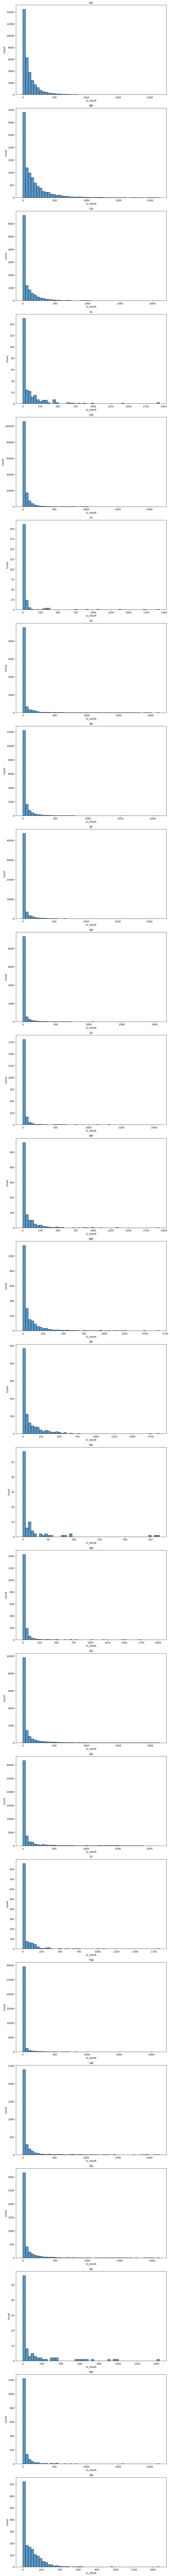

In [5]:
unique_names = sorted(train_df["ARI_CO"].unique())

# subplot을 생성하기 위한 행과 열의 수를 계산합니다.
num_rows = len(unique_names)
num_cols = 1  # 여기서는 1열로 표시합니다.

# 전체 figure를 생성합니다.
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 6 * num_rows))

# 각 고유한 "ARI_CO" 값에 대한 subplot을 생성합니다.
for i, name in enumerate(unique_names):
    df = train_df[train_df["ARI_CO"] == name]
    ax = sns.histplot(df["CI_HOUR"], bins=50, ax=axes[i])  # 각 subplot을 axes[i]에 그립니다.
    ax.set_title(name)

# subplot 간의 간격을 조정합니다.
plt.tight_layout()

# 전체 figure를 표시합니다.
plt.show()